In [1]:
#first we import the necessary files

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv(r"sentimentdataset.csv")
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [8]:
df.shape

(732, 15)

In [9]:
#  Data Cleaning and Preprocessing

# Here We have unnecessary columns name as "Unnamed: 0.1" which we can drop"

df.drop(columns=['Unnamed: 0.1'], inplace=True)

In [10]:
df.rename(columns={'Unnamed: 0':'Id'},inplace=True)
df.head()

,Id,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [11]:
#  Now, check do we have any null values in our dataset for any columns.
df.isnull().sum()

#  So, we not have any null values in our dataset. Now, we can check the datatypes of our columns.

,0
Id,0
Text,0
Sentiment,0
Timestamp,0
User,0
Platform,0
Hashtags,0
Retweets,0
Likes,0
Country,0


In [12]:
df.dtypes

,0
Id,int64
Text,object
Sentiment,object
Timestamp,object
User,object
Platform,object
Hashtags,object
Retweets,float64
Likes,float64
Country,object


In [13]:
df.dtypes

df['Timestamp'].head()

,Timestamp
0,2023-01-15 12:30:00
1,2023-01-15 08:45:00
2,2023-01-15 15:45:00
3,2023-01-15 18:20:00
4,2023-01-15 19:55:00


In [14]:
#  We can see Day,Month,Year columns are in object datatype. We need to convert them into datetime format.
#  We can use pd.to_datetime() to convert the columns into datetime format.

df['Timestamp'] = pd.to_datetime(df['Timestamp'])

#  Now, we can extract the day, month and year from the timestamp column.
#  We can use dt.day, dt.month and dt.year to extract the day, month and year from the timestamp column.

df['Day'] = df['Timestamp'].dt.day
df['Month'] = df['Timestamp'].dt.month
df['Year'] = df['Timestamp'].dt.year

In [15]:
#  We use this to remove the unwanted space from the columns.

df['Text']= df['Text'].str.strip()
df['Sentiment']= df['Sentiment'].str.strip()
df['User']= df['User'].str.strip()
df['Platform']= df['Platform'].str.strip()
df['Hashtags']= df['Hashtags'].str.strip()
df['Country']= df['Country'].str.strip()

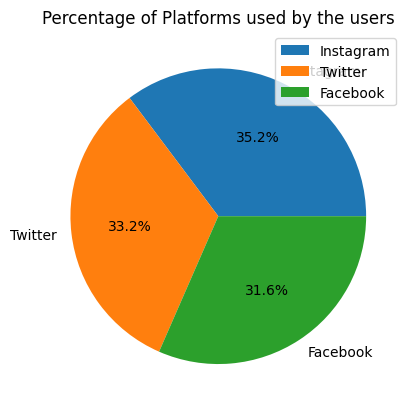

In [16]:
#now we are performing EDA
#  First, we can check the percentage of Platforms used by the users.

df['Platform'].value_counts().plot(kind='pie', autopct='%1.1f%%' ,  ylabel='', )
plt.title('Percentage of Platforms used by the users')

plt.legend()
plt.show()

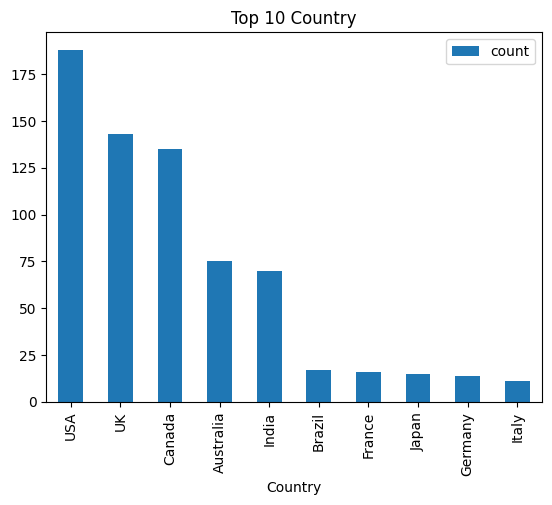

In [17]:
#  Top 10 Countries using the platform most for providing feedback or sentiment.

df['Country'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 Country')
plt.legend()
plt.show()

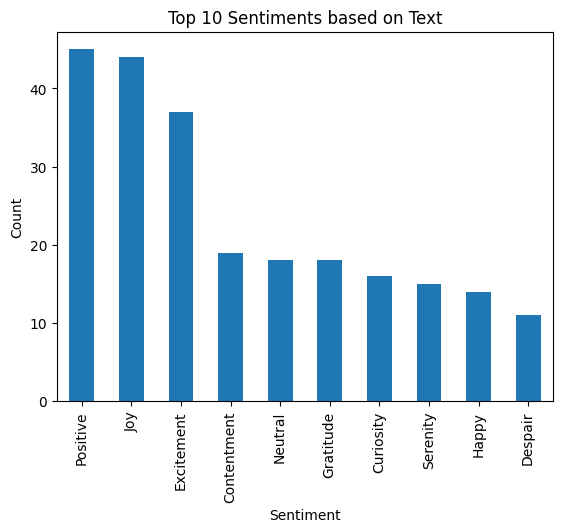

In [18]:
#  Check out for sentiments based on text, What type of sentiment they give mostly.

df['Sentiment'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 Sentiments based on Text')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

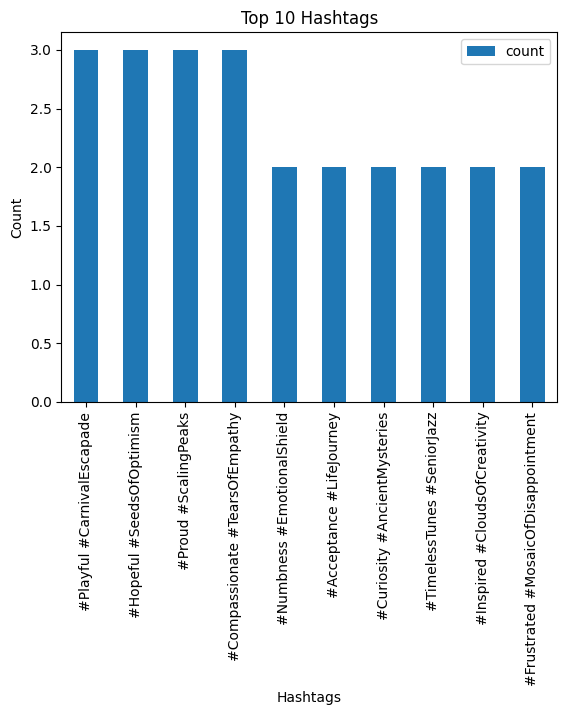

In [19]:
#  We can check what type of Hashtags are most used by the users.

df['Hashtags'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 Hashtags')
plt.xlabel('Hashtags')
plt.ylabel('Count')
plt.legend()
plt.show()

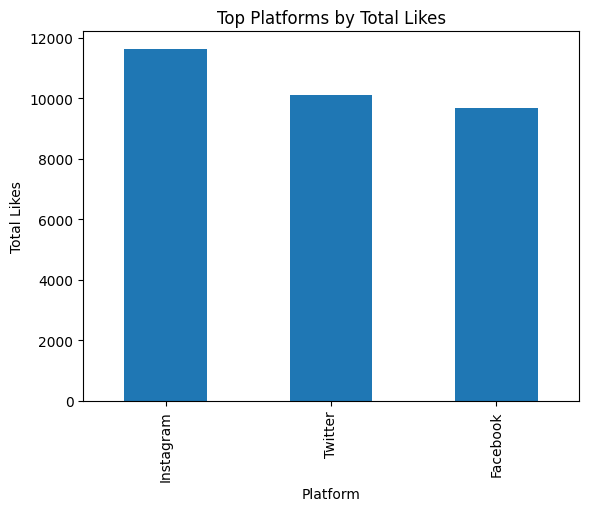

In [20]:
#  Platform that is most liked by the users.

top_liked_platform = df.groupby('Platform')['Likes'].sum().nlargest(10)
top_liked_platform.plot(kind='bar')
plt.title('Top Platforms by Total Likes')
plt.xlabel('Platform')
plt.ylabel('Total Likes')
plt.show()

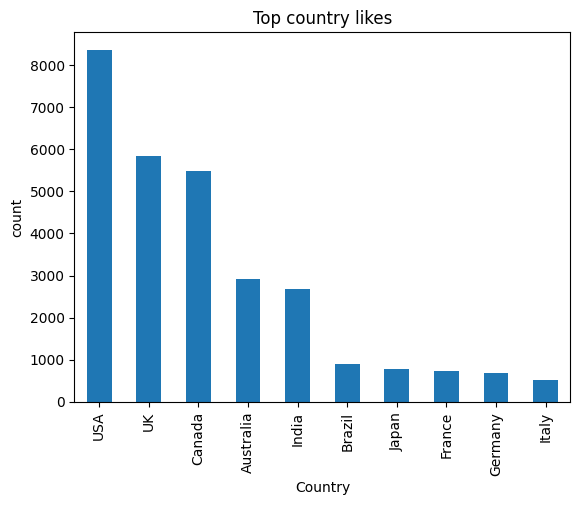

In [21]:
#  Top country that has most liked by the users.

top_country_likes=df.groupby('Country')['Likes'].sum().nlargest(10)
top_country_likes.plot(kind='bar')
plt.title('Top country likes')
plt.xlabel('Country')
plt.ylabel('count')
plt.show()

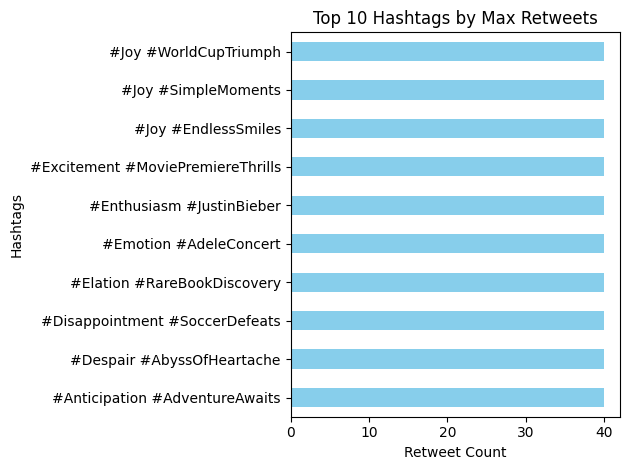

In [22]:
#  Top Re-tweeted hashtags by the users.

Hashtag = df.groupby('Hashtags')['Retweets'].max().nlargest(10)

Hashtag.sort_values().plot(kind='barh', color='skyblue')
plt.title('Top 10 Hashtags by Max Retweets')
plt.xlabel('Retweet Count')
plt.ylabel('Hashtags')
plt.tight_layout()
plt.show()

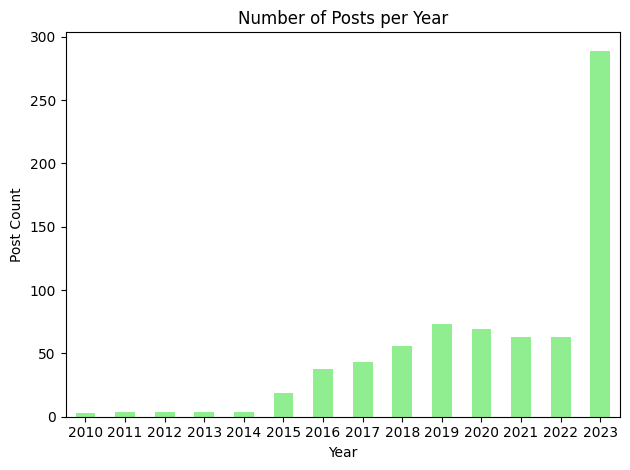

In [23]:
# Number of Posts per Year

df['Year'].value_counts().sort_index().plot(kind='bar', color='lightgreen')
plt.title('Number of Posts per Year')
plt.xlabel('Year')
plt.ylabel('Post Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

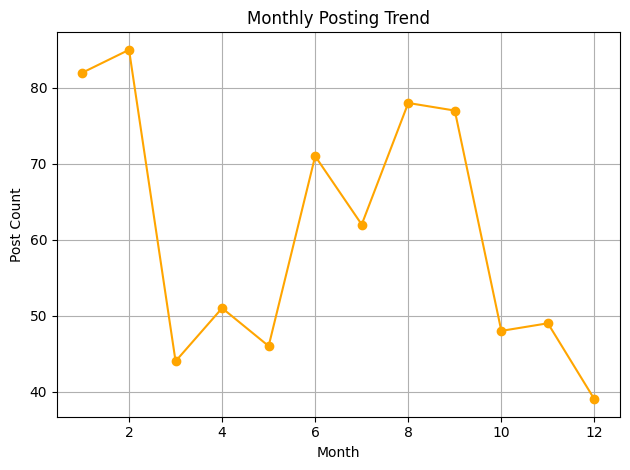

In [24]:
#  Monthly Posting Trend

df['Month'].value_counts().sort_index().plot(kind='line', marker='o', color='orange')
plt.title('Monthly Posting Trend')
plt.xlabel('Month')
plt.ylabel('Post Count')
plt.grid(True)
plt.tight_layout()
plt.show()

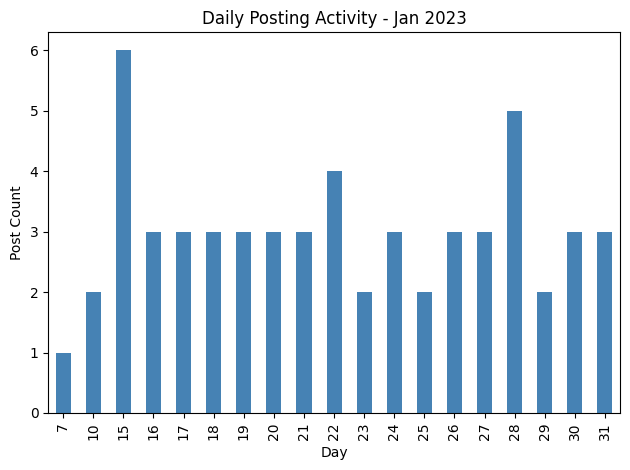

In [25]:
# Daily Activity Distribution for January 2023.

jan_df = df[(df['Year'] == 2023) & (df['Month'] == 1)]
jan_df['Day'].value_counts().sort_index().plot(kind='bar', color='steelblue')
plt.title('Daily Posting Activity - Jan 2023')
plt.xlabel('Day')
plt.ylabel('Post Count')
plt.tight_layout()
plt.show()